In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv("/kaggle/input/insurance1/insurance.csv") 

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Preprocessing

In [6]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
# Encode categorical columns
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])       # male=1, female=0
df['smoker'] = le.fit_transform(df['smoker']) # yes=1, no=0
df['region'] = le.fit_transform(df['region']) # regions encoded 0-3

print(df.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


# Exploratory Data Analysis (EDA)

# 1.Correlation Heatmap

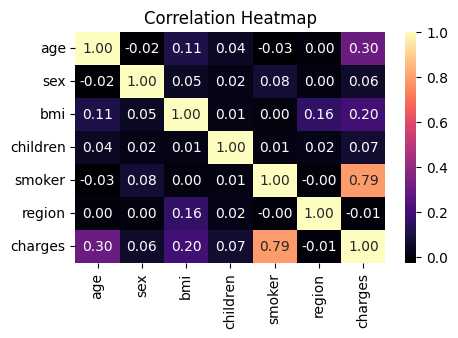

In [12]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(), annot=True, cmap="magma", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 2.Distribution of Charges

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


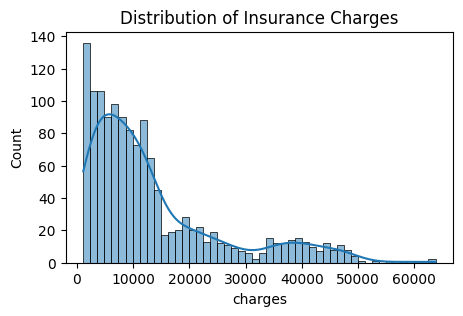

In [14]:
plt.figure(figsize=(5,3))
sns.histplot(df['charges'], bins=50, kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()

# 3.Charges by Smoker

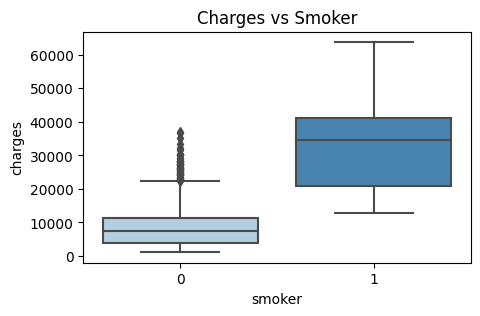

In [18]:
plt.figure(figsize=(5,3))
sns.boxplot(x='smoker', y='charges', data=df,palette="Blues")
plt.title("Charges vs Smoker")
plt.show()

# 4.Age vs Charges

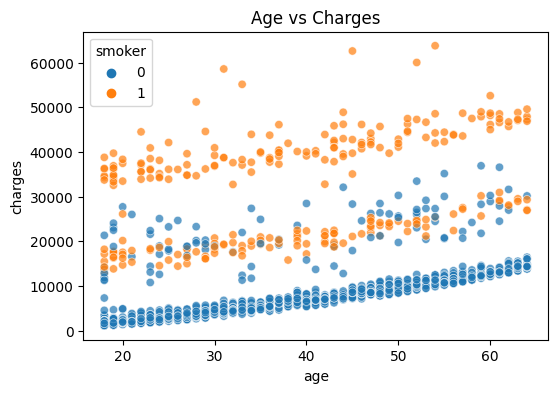

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, alpha=0.7)
plt.title("Age vs Charges")
plt.show()

# Train-Test Split

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [21]:
X = df.drop("charges", axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


# Linear Regression

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


In [26]:
print("Linear Regression:")
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("MAE:", mae_lr)
print("R² Score:", r2_lr)

Linear Regression:
MSE: 33635210.4311784
RMSE: 5799.587091438355
MAE: 4186.508898366433
R² Score: 0.7833463107364539


# Polynomial Regression

In [27]:
for degree in [2, 3, 4]:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    pr = LinearRegression()
    pr.fit(X_poly_train, y_train)

    y_pred_poly = pr.predict(X_poly_test)

    mse = mean_squared_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_poly)
    r2 = r2_score(y_test, y_pred_poly)

    print(f"\nPolynomial Regression (degree={degree}):")
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R² Score:", r2)


Polynomial Regression (degree=2):
MSE: 20970715.271709584
RMSE: 4579.379354422342
MAE: 2876.034700416045
R² Score: 0.8649218253173243

Polynomial Regression (degree=3):
MSE: 21485238.6330299
RMSE: 4635.217215301771
MAE: 2796.789137423817
R² Score: 0.8616076381006155

Polynomial Regression (degree=4):
MSE: 34263019.10394446
RMSE: 5853.462146793508
MAE: 3098.8790398286487
R² Score: 0.7793024215095758


# Compare Results

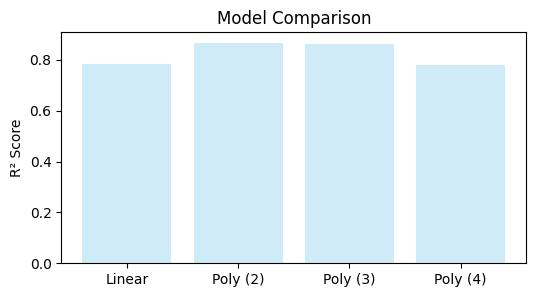

In [33]:
models = ["Linear"]
r2_scores = [r2_lr]

degrees = [2, 3, 4]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    pr = LinearRegression()
    pr.fit(X_poly_train, y_train)

    y_pred_poly = pr.predict(X_poly_test)

    r2 = r2_score(y_test, y_pred_poly)

    models.append(f"Poly ({degree})")
    r2_scores.append(r2)

plt.figure(figsize=(6,3))
plt.bar(models, r2_scores, color="skyblue",alpha=0.4)
plt.ylabel("R² Score")
plt.title("Model Comparison")
plt.show()